# Excursion on dimensionality reduction using MDS

Assume you want to plan a meeting, party or a wedding. there you might have tables (of variable size). Now you know that there are some trouble makers in your grup of invitees. Imagnine that one branch of the family that doen't like that one branch of another family or maybe some people with wildly different political views ... anyway what you could do prior to the meeting is to generate a "dislike matrix"
Such a matrix would contain for each and every person your asessment how much they like each other or not. Since this matrix will need to be symetric you need to enter a "common liking" score.

lets assume we have the following list of people:


In [62]:
names = np.array(['Ursula', 'Helga', 'Gisela', 'Inge', 'Gerda', 'Ingrid', 'Ingeborg', 'Ilse', 'Edith', 'Hildegard' ,'Jan', 'Tobias', 'Christian', 'Alexander', 'Daniel', 'Patrick', 'Dennis', 'Sebastian', 'Marcel', 'Philipp','Ben', 'Luis' , 'Paul', 'Lukas' , 'Jonas', 'Leon', 'Finn' , 'Noah', 'Elias', 'Luca' , 'Emma', 'Mia', 'Hannah', 'Sofia' , 'Emilia', 'Anna', 'Lena', 'Lea', 'Emily', 'Marie'])

we assume some random "dislike score" (to make it easy for coding now but feel free to adjust to your needs)

In [89]:
import numpy as np 
#our freinds dislike is gamma distributes because they are all weird
from scipy.stats import gamma
n = len(names)
dislike_matrix = np.ones([n,n])
for i in range(n):
    for j in range(n):
        if i==j:
            #people like themselves
            dislike_matrix[i,j] = 0
        else:
            dislike = np.abs(np.random.normal(1,2, size=1))                    
            #jeah not efficient programming but whatever
            dislike_matrix[i,j] = dislike
            dislike_matrix[j,i] = dislike     

Let's have a look at out dislike matrix

In [90]:
import matplotlib.pyplot as plt

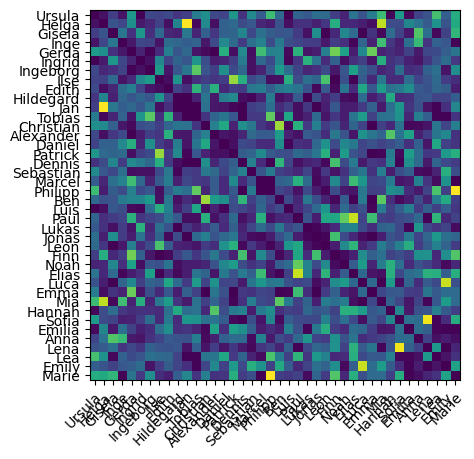

In [91]:
fig, ax = plt.subplots()
im = ax.imshow(dislike_matrix)

# Set ticks
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))

# Set tick labels
ax.set_xticklabels(names)
ax.set_yticklabels(names)

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

Ok we can do the trick with MDS to generate an arrangement in 2D that shares virtually the same dislike matrix

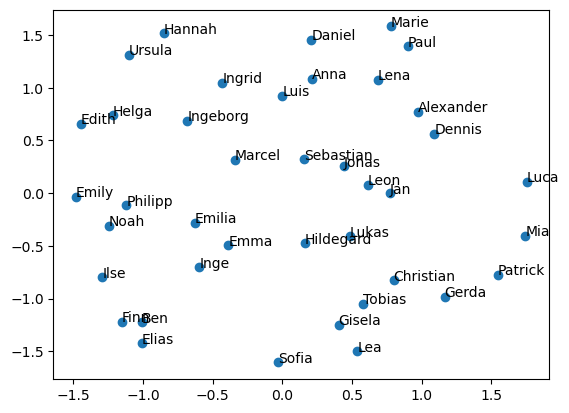

In [92]:
from sklearn.manifold import MDS

# Perform MDS
mds = MDS(n_components=2, dissimilarity='precomputed')
embedding = mds.fit_transform(dislike_matrix)

# Plot the embedding
import matplotlib.pyplot as plt

plt.scatter(embedding[:, 0], embedding[:, 1])
for i, name in enumerate(names):
    plt.text(embedding[i, 0], embedding[i, 1], name)
plt.show()

Depending on the random numbers there are verry different arragnements but ok. Let's do a simple k-means clustering because we know we can only make 3 tables. We want to minimize the conflict potential at each table by only seating peoplke together that will not hate each other. In our strange social experiment there are no interactions between tables.

In [93]:
from sklearn.cluster import KMeans

# X is the precomputed distance matrix
# k is the number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=3000, n_init=100, random_state=0)
kmeans.fit(dislike_matrix)

# Get the cluster assignments for each point
labels = kmeans.labels_

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_



Ok let's plot the scatter plot from above with the tables as colors and the centroids as well

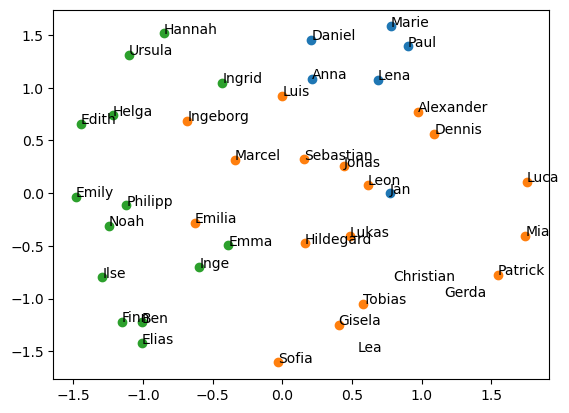

In [94]:
for label in range(3):
    idx = np.where(labels==label)
    plt.scatter(embedding[idx, 0], embedding[idx, 1])
    
for i, name in enumerate(names):
    plt.text(embedding[i, 0], embedding[i, 1], name)
plt.show()

Would you have drawn the groups like that?
Let's see what happens at the distance matrix if we want to analye inner table dislike ... or "stress"

In [95]:
idx = np.argsort(labels)

dislike_matrix = dislike_matrix[idx,:]
dislike_matrix = dislike_matrix[:,idx]

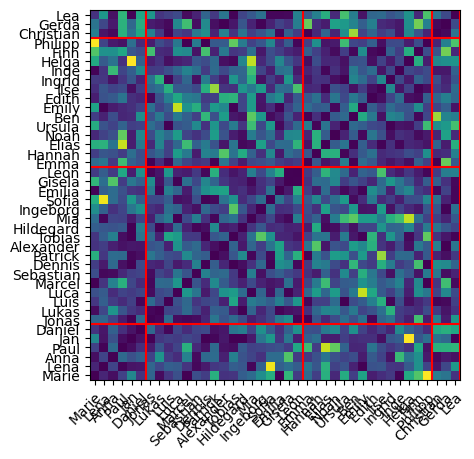

In [108]:
fig, ax = plt.subplots()

idx = np.argsort(labels)

im = ax.imshow(dislike_matrix,origin="lower")

for i in range(4):
    m = max(np.where(labels[idx]==i)[0])
    plt.plot([0-0.5,n-0.5],[m+0.5,m+0.5],c='red')
    plt.plot([m+0.5,m+0.5],[0-0.5,n-0.5],c='red')
# Set ticks
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))

# Set tick labels
ax.set_xticklabels(names[idx])
ax.set_yticklabels(names[idx])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

look at th squares along the diagonal these denote the dislike within a table which is minimized!